In [1]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_iris
import sklearn.metrics as metrics

from sklearn.metrics import classification_report # 정밀도와 재현율등 정보표시

import warnings
warnings.simplefilter('ignore')

import matplotlib
matplotlib.rcParams["font.family"]="AppleGothic"
matplotlib.rcParams["axes.unicode_minus"]= False

## 붓꽃 데이터 가져오기

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# [꽃잎의 길이, 너비 , 꽃받침의 길이, 너비]
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris['target'][:5]

array([0, 0, 0, 0, 0])

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


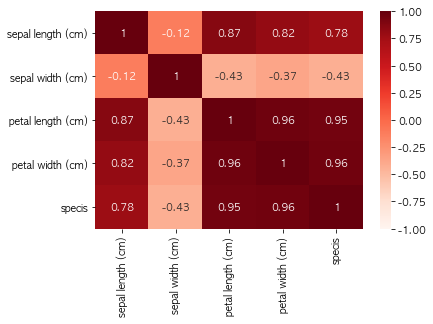

In [8]:
sns.heatmap(iris_df.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1)
plt.show()

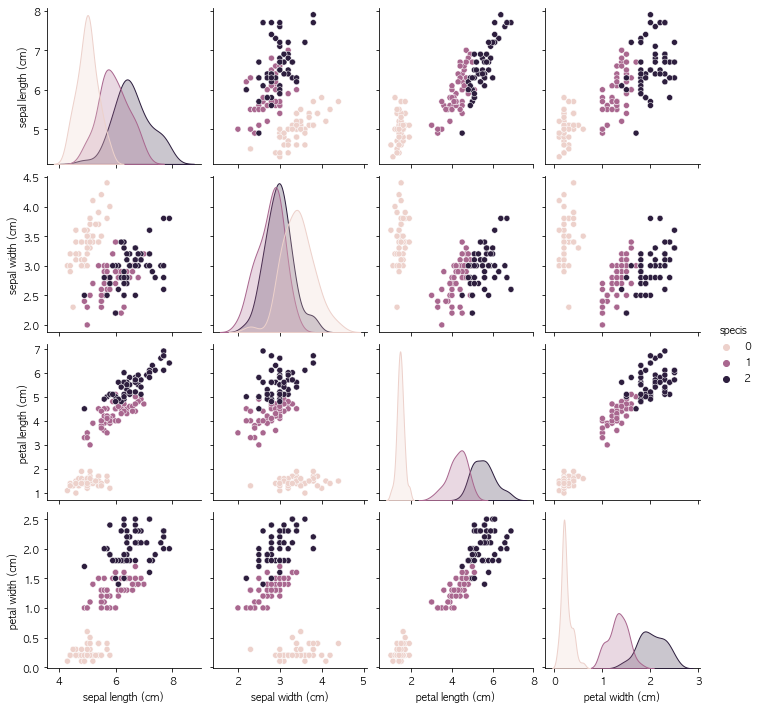

In [9]:
# hue = '인자' 인자를 기준으로 pairplot 생성
sns.pairplot(data=iris_df, hue='specis')
plt.show()

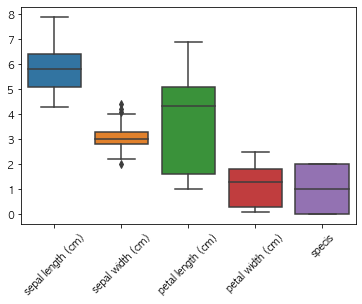

In [10]:
plt.xticks(rotation=45)
sns.boxplot(data = iris_df)
plt.show()

## 데이터 분리

In [11]:
x_data = iris_df.iloc[:,:-1]
y_data = iris_df.iloc[:,-1]

print(x_data.shape, y_data.shape)

(150, 4) (150,)


## train test셋 분리

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
        test_size=0.2, stratify=y_data)

In [13]:
# multinomaial은 softmax 방식을 기반으로 함
model_logi = LogisticRegression(multi_class='multinomial')
model_logi.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [14]:
model_logi.score(x_test, y_test)

0.9333333333333333

In [15]:
y_predict = model_logi.predict(x_test)

In [27]:
y_predict

array([2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1,
       1, 2, 1, 2, 0, 0, 0, 2])

## 히트맵으로 확인

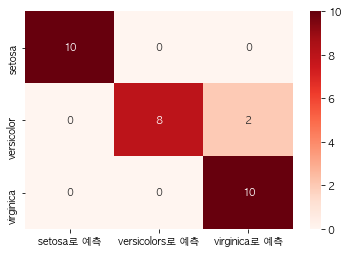

In [16]:
cm = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Reds',
            xticklabels = ['setosa로 예측', 'versicolors로 예측', 'virginica로 예측'],
            yticklabels = iris['target_names'])
plt.show()


In [28]:
cm

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]])

In [17]:
metrics.f1_score(y_test, y_predict, average='macro')

0.9326599326599326

In [18]:
x_test.values

array([[6.3, 3.4, 5.6, 2.4],
       [6.3, 2.5, 5. , 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [6.5, 3. , 5.2, 2. ],
       [5. , 3.4, 1.6, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [6.7, 3.3, 5.7, 2.1],
       [6.7, 2.5, 5.8, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [4.6, 3.1, 1.5, 0.2],
       [6. , 2.7, 5.1, 1.6],
       [6. , 2.9, 4.5, 1.5],
       [7.2, 3.6, 6.1, 2.5],
       [4.6, 3.2, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3. , 5. , 1.7],
       [5.5, 2.4, 3.7, 1. ],
       [6.7, 3.1, 5.6, 2.4],
       [4.7, 3.2, 1.3, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [7.7, 2.8, 6.7, 2. ]])

In [19]:
# 다중분류 : w의 갯수 
# 피쳐의 갯수 * 분류의 갯수
'''
ws1  * x1 + ws2  * x2 + ws3  * x3 + ws4  * x4 +bs
wvs1 * x1 + wvs2 * x2 + wvs3 * x3 + wvs4 * x4 +bs
wvc1 * x1 + wvc2 * x2 + wvc3 * x3 + wvc4 * x4 +bs
'''

# 꽃종류 마다의 w 기울기
model_logi.coef_

array([[-0.36188431,  0.94451879, -2.39428073, -1.01555723],
       [ 0.57169107, -0.36377493, -0.26774141, -0.82942877],
       [-0.20980676, -0.58074386,  2.66202213,  1.844986  ]])

In [20]:
# 꽃종류 마다의 b 값
model_logi.intercept_

array([  9.01713088,   2.05967306, -11.07680393])

In [21]:
# .predict_proba와 동일한 결과
np.matmul(x_test.values, model_logi.coef_.T) + model_logi.intercept_

array([[ -5.89668578,   0.93451108,   4.9621747 ],
       [ -4.80240564,   1.83726775,   2.96513789],
       [ -6.88326018,   1.29573205,   5.58752813],
       [ -2.40108711,   1.60650053,   0.79458658],
       [ -6.62261485,   1.30669674,   5.31591812],
       [ -4.98293497,   1.63322734,   3.34970764],
       [  6.18200118,   2.92113586,  -9.10313704],
       [ -0.20995175,   2.16406926,  -1.9541175 ],
       [  6.58835227,   3.17096486,  -9.75931713],
       [ -2.43610104,   2.42303844,   0.01306259],
       [ -6.07065228,   1.42161949,   4.64903279],
       [ -6.76102822,   1.93469393,   4.82633429],
       [  5.73920527,   2.89236097,  -8.63156625],
       [  7.096293  ,   3.04802366, -10.14431666],
       [ -1.31264024,   1.99382106,  -0.68118082],
       [  6.48593879,   2.9942518 ,  -9.48019059],
       [ -4.43969749,   1.81505993,   2.62463756],
       [ -2.71266958,   1.98589266,   0.72677691],
       [ -7.33217398,   1.15946447,   6.17270951],
       [  6.81981874,   2.98464

In [22]:
model_logi.predict_proba(x_test)

array([[1.88964131e-05, 1.75037247e-02, 9.82477379e-01],
       [3.19641439e-04, 2.44476203e-01, 7.55204156e-01],
       [3.78532163e-06, 1.34956555e-02, 9.86500559e-01],
       [1.24315300e-02, 6.83908157e-01, 3.03660313e-01],
       [6.41722865e-06, 1.78239430e-02, 9.82169640e-01],
       [2.03854399e-04, 1.52294027e-01, 8.47502119e-01],
       [9.63061373e-01, 3.69384057e-02, 2.21514816e-07],
       [8.39258218e-02, 9.01404721e-01, 1.46694571e-02],
       [9.68243464e-01, 3.17564595e-02, 7.69629954e-08],
       [7.06754336e-03, 9.11099785e-01, 8.18326720e-02],
       [2.12617679e-05, 3.81462333e-02, 9.61832505e-01],
       [8.79460756e-06, 5.25678977e-02, 9.47423308e-01],
       [9.45154818e-01, 5.48446392e-02, 5.42445589e-07],
       [9.82846783e-01, 1.71531855e-02, 3.19877857e-08],
       [3.31468911e-02, 9.04525259e-01, 6.23278494e-02],
       [9.70450201e-01, 2.95496857e-02, 1.12972143e-07],
       [5.91370546e-04, 3.07798377e-01, 6.91610253e-01],
       [7.04429194e-03, 7.73387

In [23]:
model_logi.predict_proba(x_test).argmax(axis=1)

array([2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1,
       1, 2, 1, 2, 0, 0, 0, 2])

In [24]:
model_logi.predict(x_test)

array([2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1,
       1, 2, 1, 2, 0, 0, 0, 2])

In [25]:
# 5.2, 3.5, 1.5, 0.2일떄는 얼마인가?
# 둘 코드는 같은 결과
model_logi.predict_proba([[5.2, 3.5, 1.5, 0.2]]).argmax(axis=1)

model_logi.predict([[5.2, 3.5, 1.5, 0.2]])

array([0])

## 데이터 확인

In [26]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.80      0.89        10\n           2       0.83      1.00      0.91        10\n\n    accuracy                           0.93        30\n   macro avg       0.94      0.93      0.93        30\nweighted avg       0.94      0.93      0.93        30\n'